In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('imori.jpg')
img_n = cv2.imread('imori_noise.jpg')

H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

gray = 0.2126*r + 0.7152*g + 0.0722*b
gray = gray.astype(np.uint8)

#### Question_11 均值滤波器
均值滤波器使用网格内像素的平均值

In [5]:
# Median Filter
K_size = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.mean(tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

# Save result
cv2.imwrite("output_11.jpg", out)

True

#### Question_12 Motion Filter
Motion Filter 取对角线方向的像素平均值作为输出

In [14]:
# Median Filter
K_size = 3 
K = np.diag([1] * K_size).astype(np.float)
K /= K_size

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.sum(K * tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

# Save result
cv2.imwrite("output_12.jpg", out)

True

#### Question_13 MAX-MIN滤波器

In [7]:
K_size = 3 # 确定滤波器的边长

pad = K_size // 2 # 确定填充的长度
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float) # 生成填充后大小相同的零矩阵
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float) # 将原始的图像嵌入到零矩阵当中
tmp = out.copy() 

# 滤波过程，图像从左上角开始计算并将结果填充原始图像的对应左上角位置
for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.max(tmp[y:y+K_size, x:x+K_size]) - np.min(tmp[y:y+K_size, x:x+K_size])

# 取出经过处理后的图像
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

# Save result
cv2.imwrite("output_13.jpg", out)

True

#### Question_14 微分滤波器
获取邻接像素的差值（纵向、横向）

In [21]:
K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

Kv = [[0., -1., 0.], 
      [0., 1., 0.], 
      [0., 0., 0.]]

Kh = [[0., 0., 0.], 
      [-1., 1., 0.],
      [0., 0., 0.]]

for y in range(H):
    for x in range(W):
        out_v[pad+y, pad+x] = np.sum(Kv * tmp[y:y+K_size, x:x+K_size])
        out_h[pad+y, pad+x] = np.sum(Kh * tmp[y:y+K_size, x:x+K_size])

out_v[out_v < 0] = 0
out_h[out_h < 0] = 0
out_v[out_v > 255] = 255
out_h[out_h > 255] = 255

out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)
out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)


cv2.imwrite("output_14_v.jpg", out_v)
cv2.imwrite("output_14_h.jpg", out_h)

True

#### Question_15 Sobel滤波器

In [22]:
K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

Kv = [[1., 0., -1.], 
      [2., 0., -2.], 
      [1., 0., -1.]]

Kh = [[1., 2., 1.], 
      [0., 0., 0.],
      [-1., -2., -1.]]

for y in range(H):
    for x in range(W):
        out_v[pad+y, pad+x] = np.sum(Kv * tmp[y:y+K_size, x:x+K_size])
        out_h[pad+y, pad+x] = np.sum(Kh * tmp[y:y+K_size, x:x+K_size])

out_v[out_v < 0] = 0
out_h[out_h < 0] = 0
out_v[out_v > 255] = 255
out_h[out_h > 255] = 255

out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)
out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)


cv2.imwrite("output_15_v.jpg", out_v)
cv2.imwrite("output_15_h.jpg", out_h)

True

#### Question_16 Prewitt 滤波器

In [10]:
K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

Kv = [[-1., -1., -1.], 
      [0., 0., -0.], 
      [1., 1., 1.]]

Kh = [[-1., 0., 1.], 
      [-1., 0., 1.],
      [-1., 0., 1.]]

for y in range(H):
    for x in range(W):
        out_v[pad+y, pad+x] = np.sum(Kv * tmp[y:y+K_size, x:x+K_size])
        out_h[pad+y, pad+x] = np.sum(Kh * tmp[y:y+K_size, x:x+K_size])

out_v[out_v < 0] = 0
out_h[out_h < 0] = 0
out_v[out_v > 255] = 255
out_h[out_h > 255] = 255

out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)
out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)


cv2.imwrite("output_16_v.jpg", out_v)
cv2.imwrite("output_16_h.jpg", out_h)

True

#### Question_17 Laplacian 滤波器

In [11]:
K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

K = [[0., 1., 0.], [1., -4., 1.], [0., 1., 0.]]

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

out[out < 0] = 0
out[out > 255] = 255

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

cv2.imwrite("output_17.jpg", out)

True

#### Question_18 Emboss滤波器

In [12]:
K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

K = [[-2., -1., 0.], [-1., 1., 1.], [0., 1., 2.]]

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

out[out < 0] = 0
out[out > 255] = 255

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

cv2.imwrite("output_18.jpg", out)

True

#### Question_19 LoG滤波器

In [14]:
# Read image
img = cv2.imread("imori_noise.jpg")
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Gaussian Filter
K_size = 5
s = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

## Kernel
K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = (x**2 + y**2 - s**2) * np.exp( -(x**2 + y**2) / (2* (s**2)))
K /= (2 * np.pi * (s**6))
K /= K.sum()

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

# Save result
cv2.imwrite("output_19.jpg", out)

True

#### Question_20 直方图

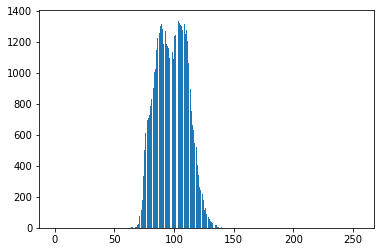

In [18]:
# Read image
img = cv2.imread("imori_dark.jpg").astype(np.float)

# Display histogram
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("output_20.png")
plt.show();